In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train_csv_dir = r"C:\Users\Pouya\Documents\university\Bachelor - AUT\Final Project\Data Set\Pre\code\Data\final_train_chb01.csv"
train_df = pd.read_csv(train_csv_dir)

In [3]:
train_df

,Window_Name,Complexity_channel_CZ-PZ,Complexity_channel_FT9-FT10,Complexity_channel_FT10-T8,Mobility_channel_F8-T8,RMS_channel_T7-FT9,STD_channel_T7-FT9,Mobility_channel_CZ-PZ,Peak-to-Peak_channel_T7-FT9,Gamma_channel_FT9-FT10,...,Mean Frequency (T-F)_channel_P4-O2,Mean Frequency (T-F)_channel_CZ-PZ,ZCR_channel_CZ-PZ,Gamma_channel_T7-P7,Complexity_channel_P7-T7,STD_channel_FT9-FT10,Complexity_channel_F7-T7,Mean Frequency_channel_CZ-PZ,Mean Frequency (T-F)_channel_FZ-CZ,Label
0,chb07_03.edf_interictal_37.npy,0.407632,0.340739,0.438505,0.140940,0.000019,0.000019,0.083983,0.000136,0.000572,...,3.652237,2.466024,0.024219,0.000439,0.355754,0.000059,0.377353,2.283887,2.196431,1
1,chb14_02.edf_interictal_20.npy,0.327348,0.655627,0.665576,0.126540,0.000032,0.000032,0.090006,0.000186,0.000969,...,5.136217,3.027137,0.026953,0.003515,0.551111,0.000069,0.567012,2.964006,3.729482,1
2,chb06_10.edf_preictal_24.npy,0.202160,0.494888,0.587527,0.125536,0.000053,0.000053,0.097361,0.000301,0.005050,...,4.084667,3.348641,0.026562,0.011079,0.698549,0.000044,0.622023,3.120006,3.924231,-1
3,chb08_11.edf_preictal_42.npy,0.548165,0.603587,0.831932,0.253602,0.000031,0.000031,0.105095,0.000271,0.002972,...,6.143222,3.285976,0.031641,0.237453,0.878482,0.000074,0.797345,2.555630,4.000319,-1
4,chb09_02.edf_interictal_20.npy,0.514567,0.982000,1.045856,0.529077,0.000043,0.000043,0.289049,0.000577,0.079863,...,10.910367,9.898590,0.088672,0.233754,1.184969,0.000047,1.166867,9.755721,10.666509,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7811,chb12_11.edf_preictal_48.npy,0.434702,0.606325,0.801471,0.141902,0.000036,0.000036,0.104493,0.000226,0.006961,...,3.152062,3.246839,0.035937,0.014404,0.628997,0.000036,0.696026,2.758168,2.986714,-1
7812,chb12_38.edf_preictal_14.npy,0.381694,0.281695,0.188421,0.105502,0.000024,0.000024,0.099289,0.000137,0.000216,...,2.910720,3.355569,0.033984,0.000441,0.296284,0.000022,0.414735,3.291541,3.945931,-1
7813,chb04_01.edf_interictal_36.npy,0.886944,1.059852,1.094195,0.745390,0.000041,0.000041,0.351057,0.000276,0.175901,...,19.393252,9.026134,0.102734,0.586201,1.057724,0.000039,1.021448,8.277909,6.324756,1
7814,chb14_06.edf_preictal_17.npy,0.406796,0.448256,0.567792,0.108647,0.000014,0.000014,0.102455,0.000097,0.003425,...,5.816481,3.320129,0.038281,0.016522,0.664059,0.000025,0.491912,2.944634,2.690035,-1


In [4]:
print('Number of windows: ',len(train_df))

Number of windows:  7816


In [5]:
print('Number of features: ',len(train_df.columns) - 2) # One column for names and another for labels

Number of features:  20


# HeatMap

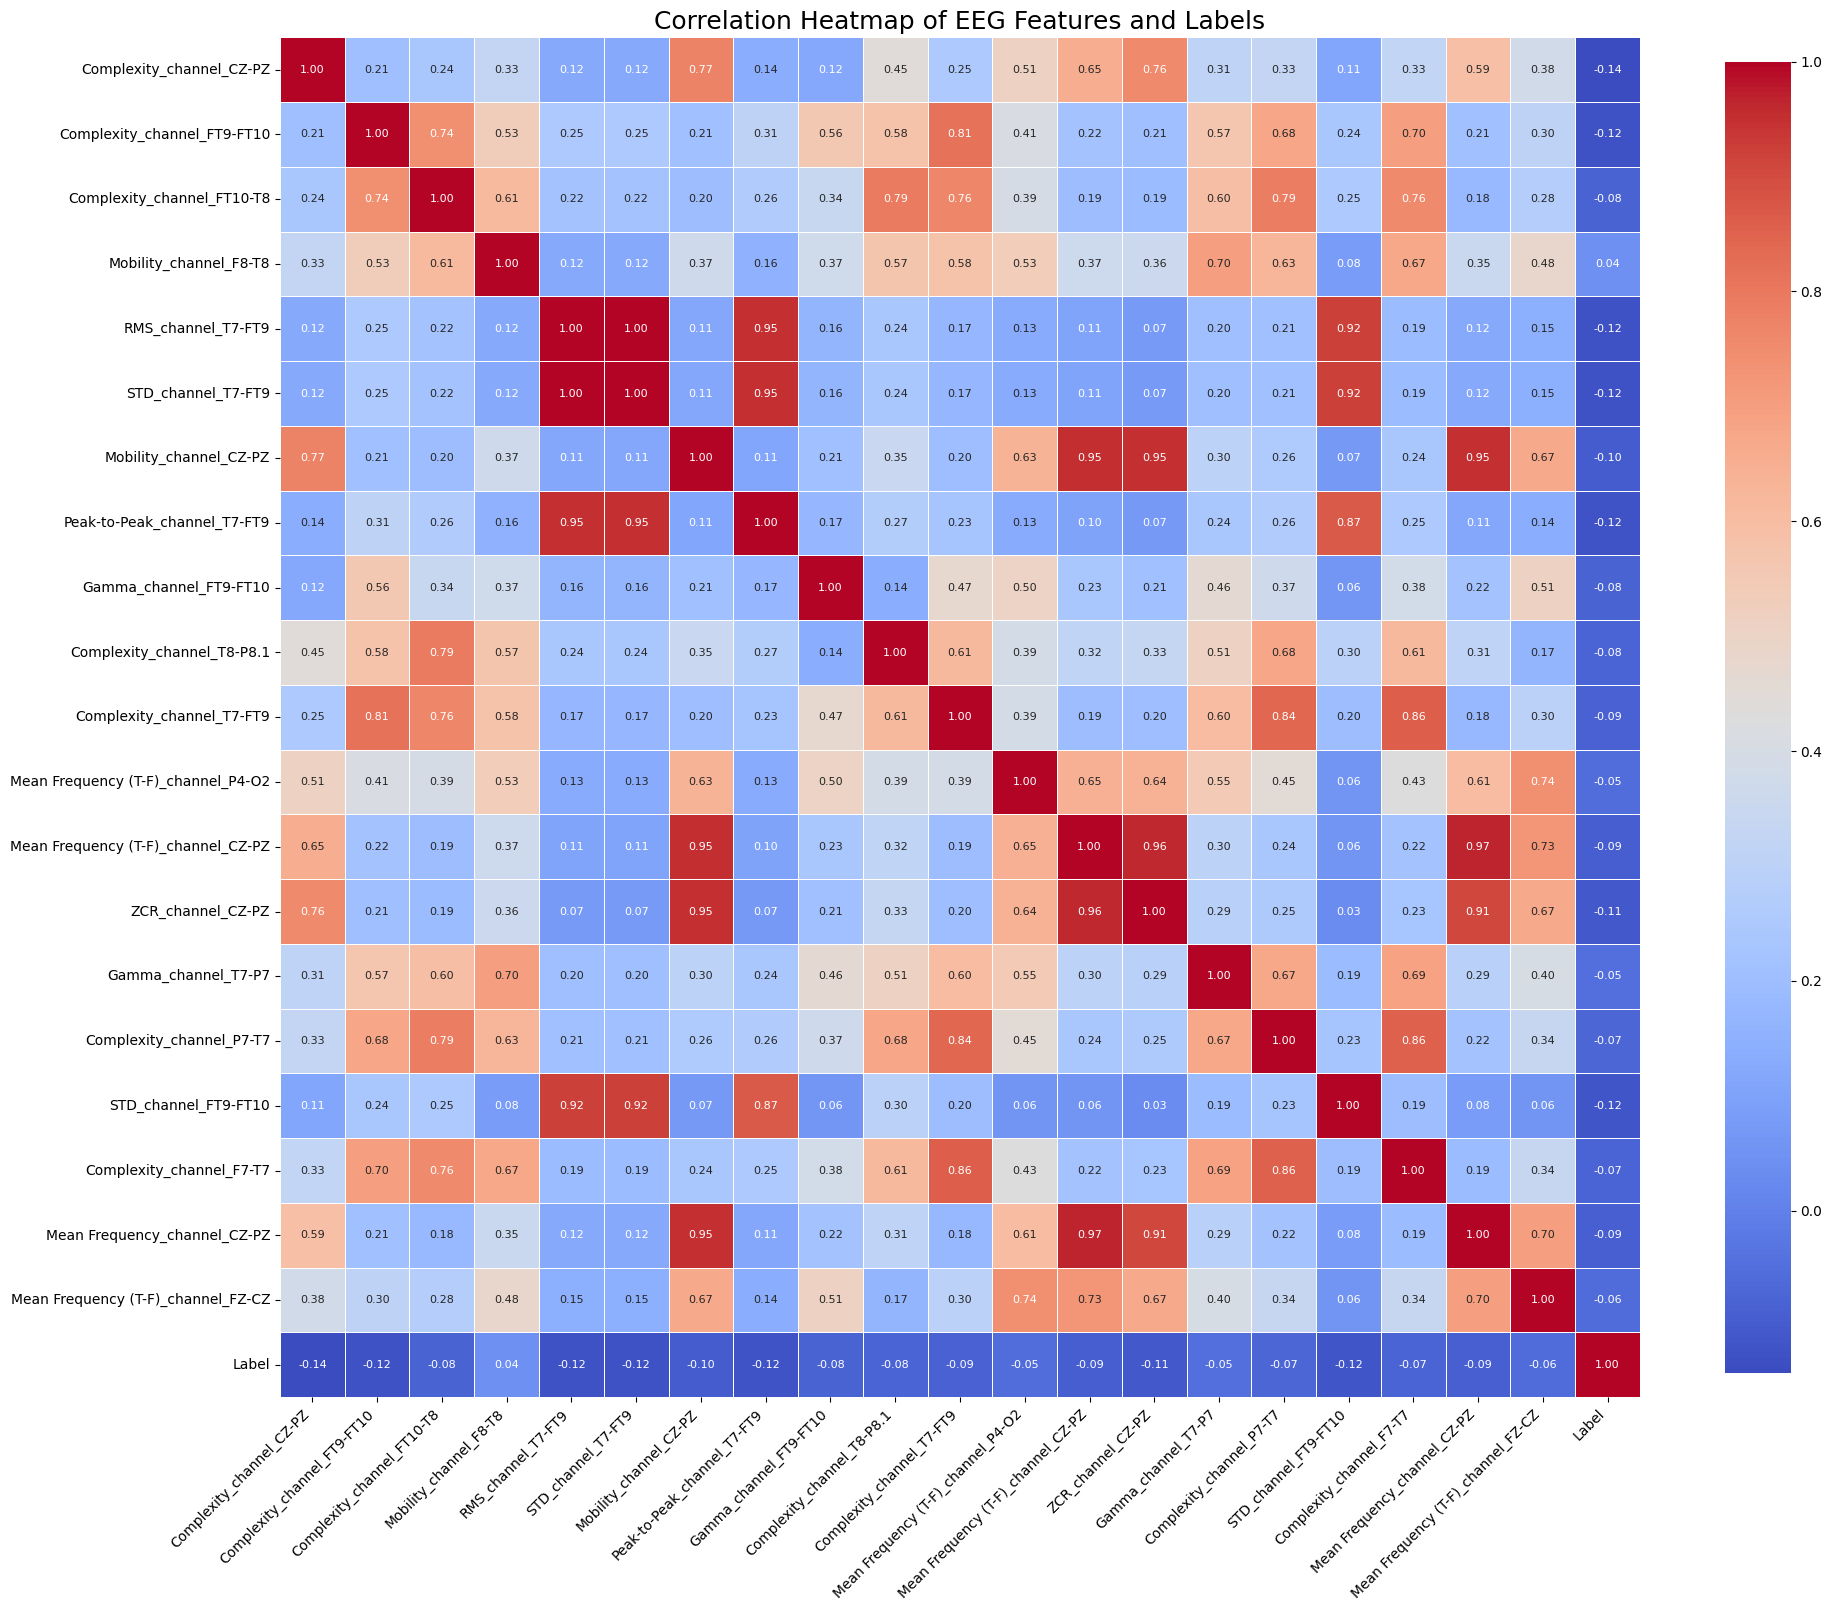

In [6]:
corr_matrix = train_df.iloc[:,1:].corr()

# Plot the heatmap with a larger figure size and smaller annotations
plt.figure(figsize=(20, 18))  # Increase the figure size significantly
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, 
            annot_kws={"size": 8}, square=True, cbar_kws={"shrink": 0.8}, 
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

# Rotate the x and y labels more to avoid overlap
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Set the title for the plot
plt.title('Correlation Heatmap of EEG Features and Labels', fontsize=18)

# Adjust layout to ensure everything is visible
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
corr_matrix['Label'].std()

0.24046306489479763

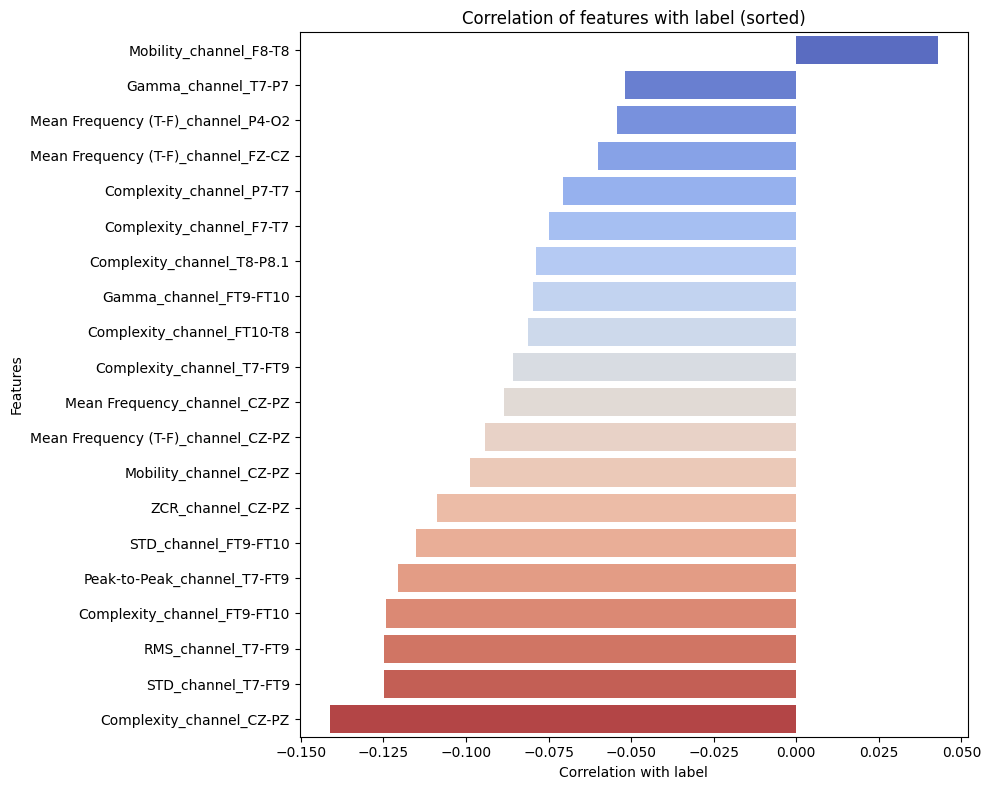

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called df
# Drop the first column (names), keep features and labels
features_df = train_df.iloc[:, 1:]  # from column 2 to the end

# Compute correlations with the label column (assumed to be the last one)
correlations = features_df.corr().iloc[:-1, -1]  # all rows except the label, and last column

# Convert to DataFrame and reset index for plotting
correlation_df = correlations.reset_index()
correlation_df.columns = ['features', 'correlation_with_label']

# Sort by correlation
correlation_df = correlation_df.sort_values(by='correlation_with_label', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='correlation_with_label', y='features', data=correlation_df, palette='coolwarm')

plt.title('Correlation of features with label (sorted)')
plt.xlabel('Correlation with label')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


## Pairplot

KeyboardInterrupt: 

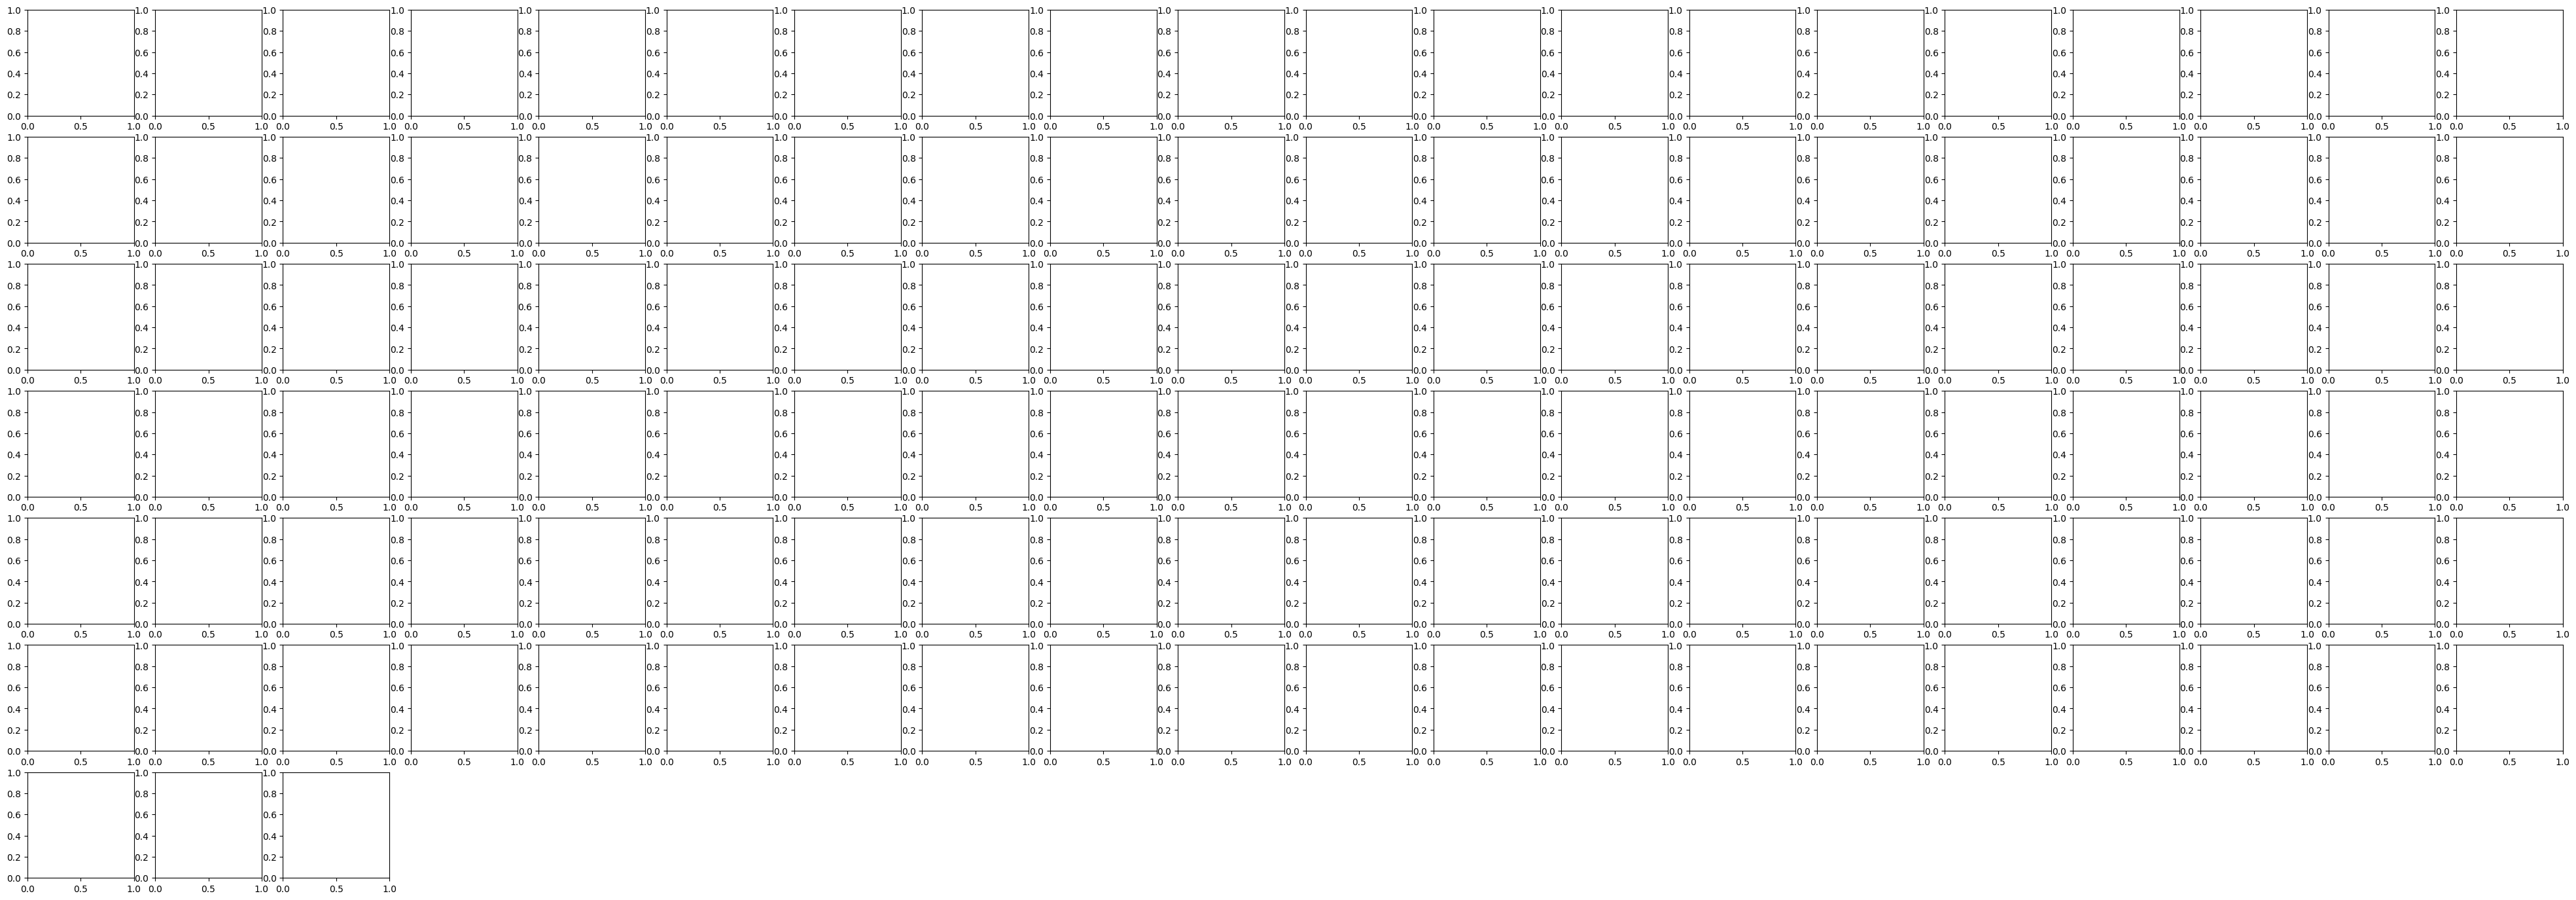

In [10]:

# Remove the 'Label' column for the pairplot (or you can include it as 'hue' if desired)
features_df = train_df.drop(columns=['Label'])

# Create a pairplot for all EEG features
sns.pairplot(train_df, hue='Label', height=2.5, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})

# Set the title
plt.suptitle('Pairplot of EEG Features', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
